# 3D Visualization

This tutorial contains demonstrations of 3D visualization, including plotting isosurfaces, orthogonal slices, glyphs, streamlines, and medial axis.

## Import packages

In [1]:
import dpm_tools as dpm
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('static')

[08:58:47] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=977263;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=364827;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

## Read in Data

Here, we will read in 3D sphere pack image and its associated velocity field.

We store the components and the segmented image in an ``Image`` dataclass. This allows us to keep track of the images for 3D visualization purposes.

In [ ]:
# Load the image
vx = np.load("../../_static/vx_rsz_100.npy")
vy = np.load("../../_static/vy_rsz_100.npy")
vz = np.load("../../_static/vz_rsz_100.npy")

segmented = (vx != 0).astype(np.uint8)


## Creating a DRP Tools Image class, specifying the image, the scalar data, and the vectors
bentheimer_ss_data = dpm.io.Image(scalar=segmented, vector=[vx, vy, vz])

## Visualizing Scalar Quantities

The following functions are used to visualize the data associated with the ``scalar`` value in the ``dpm.io.Image()`` dataclass. This is commonly the segmented image.

### Plotting a Slice

The ``dpm_tools.visualization.plot_slice()`` function plots a single 2D slice of the image at the specified slice number. By default, the function visualizes slices at half of each axes length. A slider can be added to change the slice number.

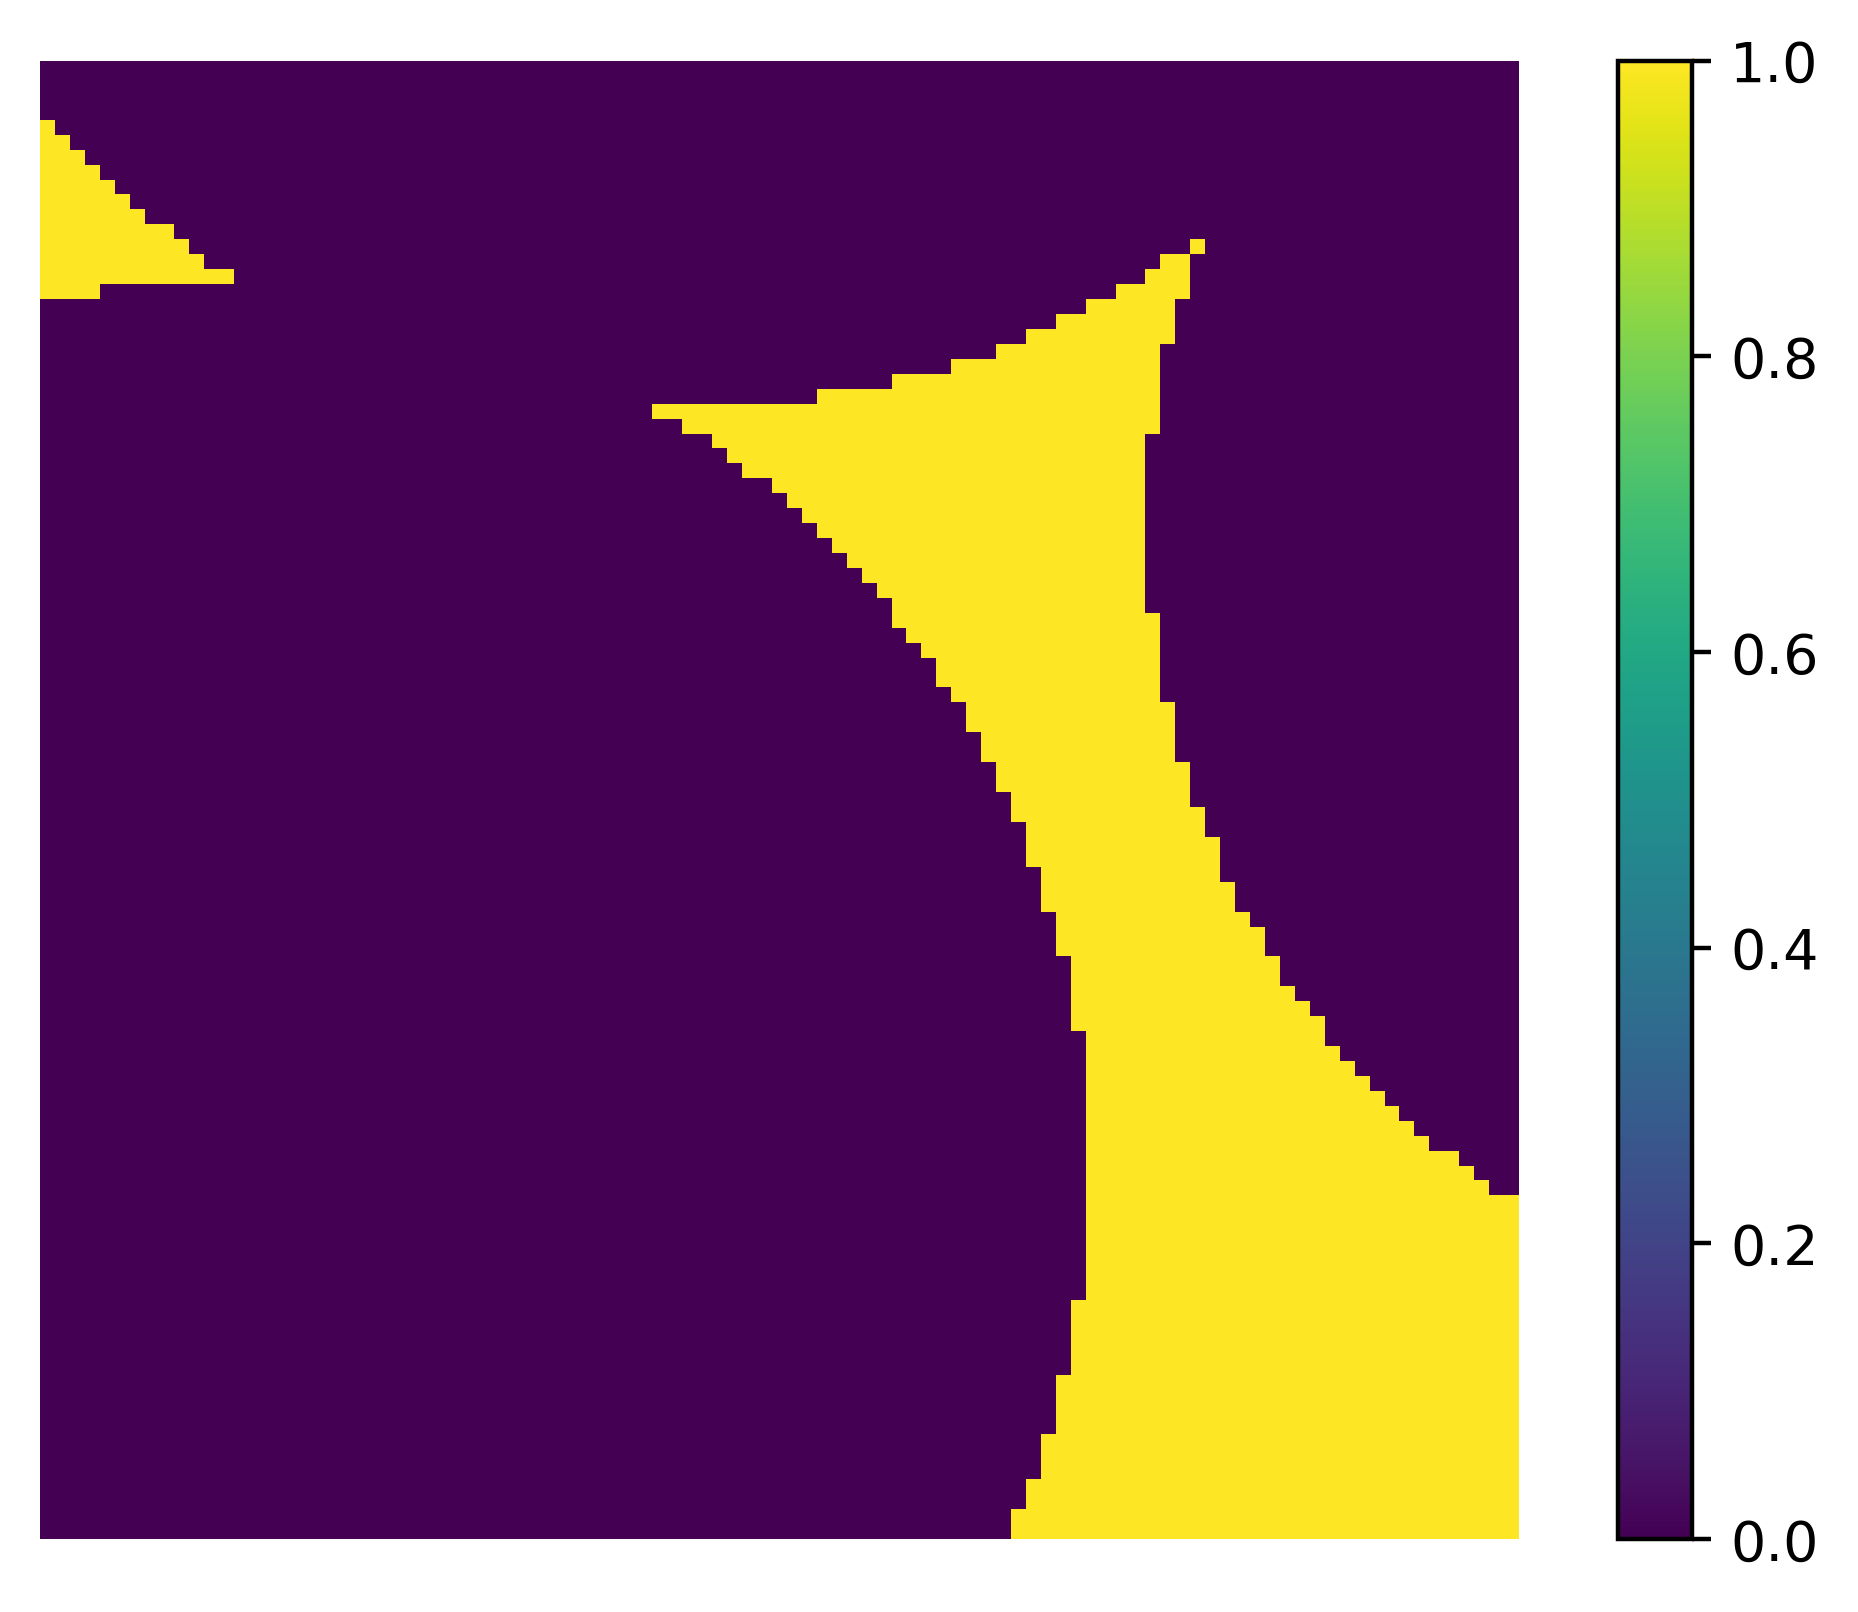

In [25]:
p = dpm.visualization.plot_slice(bentheimer_ss_data, slice_num=50, slice_axis=0)

### Orthogonal Slices

The ``dpm_tools.visualization.orthogonal_slices()`` function plots orthogonal slices of the image. By default, the function visualizes slices at half of each axes length. A slider can be added to change the slice number.

The image can be further customized using the ``mesh_kwargs`` parameter, which accepts a dictionary of keyword arguments for the PyVista mesh object.

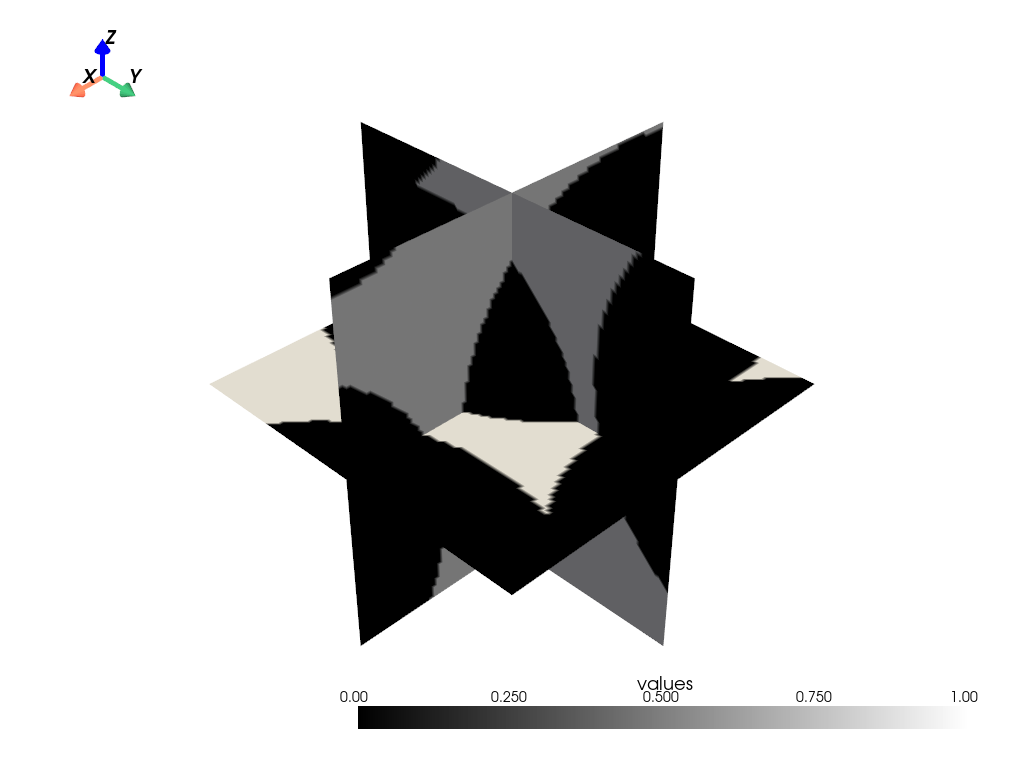

In [ ]:
p = dpm.visualization.orthogonal_slices(bentheimer_ss_data, slider=False, mesh_kwargs={"cmap": "binary_r"})
p.show(jupyter_backend="static")

### Isosurface

The ``dpm_tools.visualization.plot_isosurface()`` function plots the specified isosurface between two given phases. If no isosurfaces are provided, the value halfway between the minimum and maximum values of the image is selected.

The image can be further customized using the ``mesh_kwargs`` parameter, which accepts a dictionary of keyword arguments for the PyVista mesh object.

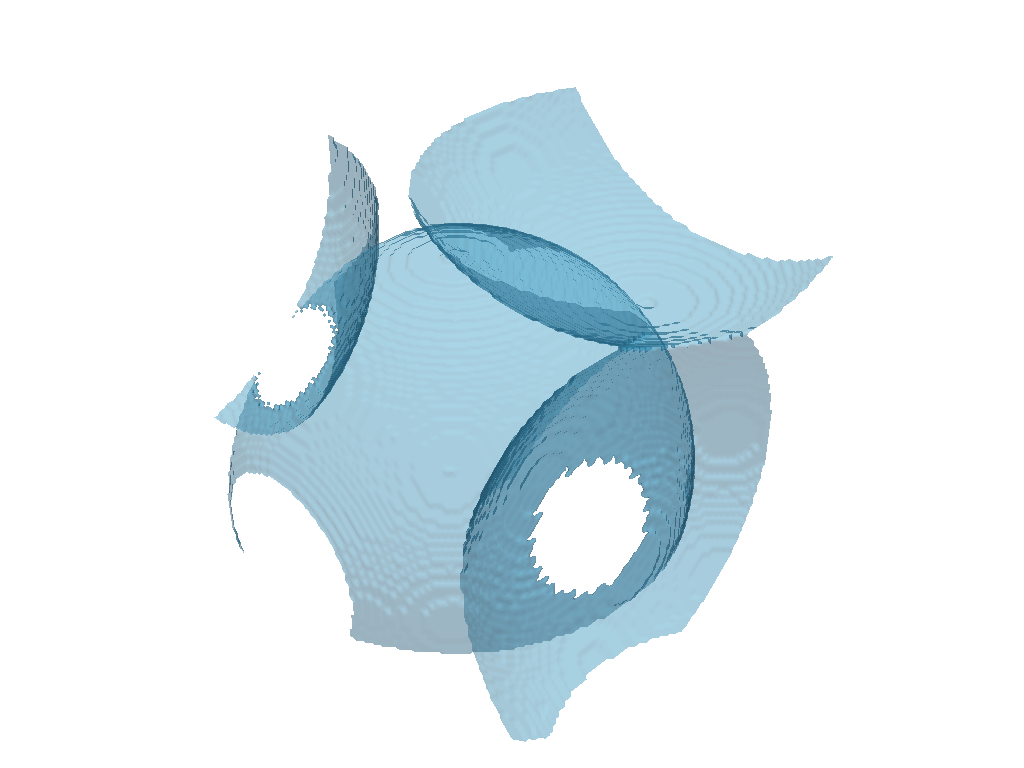

In [ ]:
p = dpm.visualization.plot_isosurface(bentheimer_ss_data, show_isosurface=[0.5])
p.show(jupyter_backend="static")

### Medial Axis

The ``dpm_tools.visualization.plot_medial_axis()`` function computes and plots the medial axis of a 3D object.

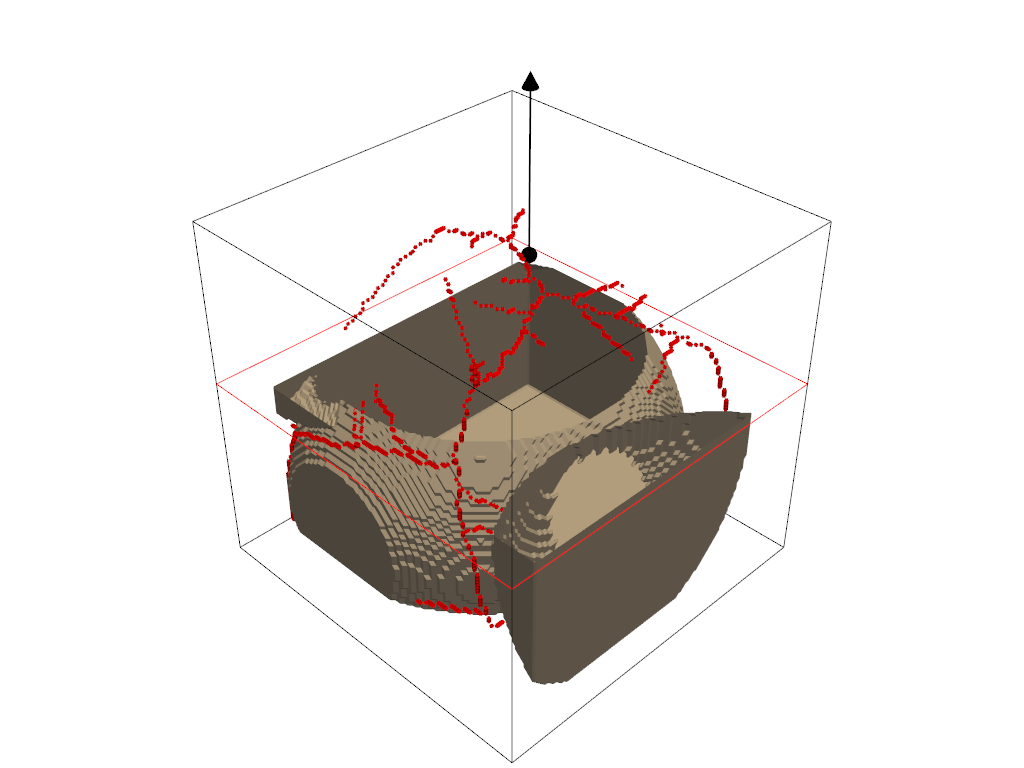

In [26]:
p = dpm.visualization.plot_medial_axis(bentheimer_ss_data, show_isosurface=[0.5])
p.show(jupyter_backend="static")

## Visualizing Vector Quantities

The following functions are used to visualize the data associated with the ``vector`` attribute in the ``dpm.io.Image()`` dataclass. This is commonly the segmented image.

### Glyphs

The ``dpm_tools.visualization.plot_glyph()`` function plots glyphs at each voxel in the image. The glyphs can be customized using the ``glyph_kwargs`` parameter, which accepts a dictionary of keyword arguments for the PyVista glyph object.

C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\pyvista\core\utilities\points.py:77: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


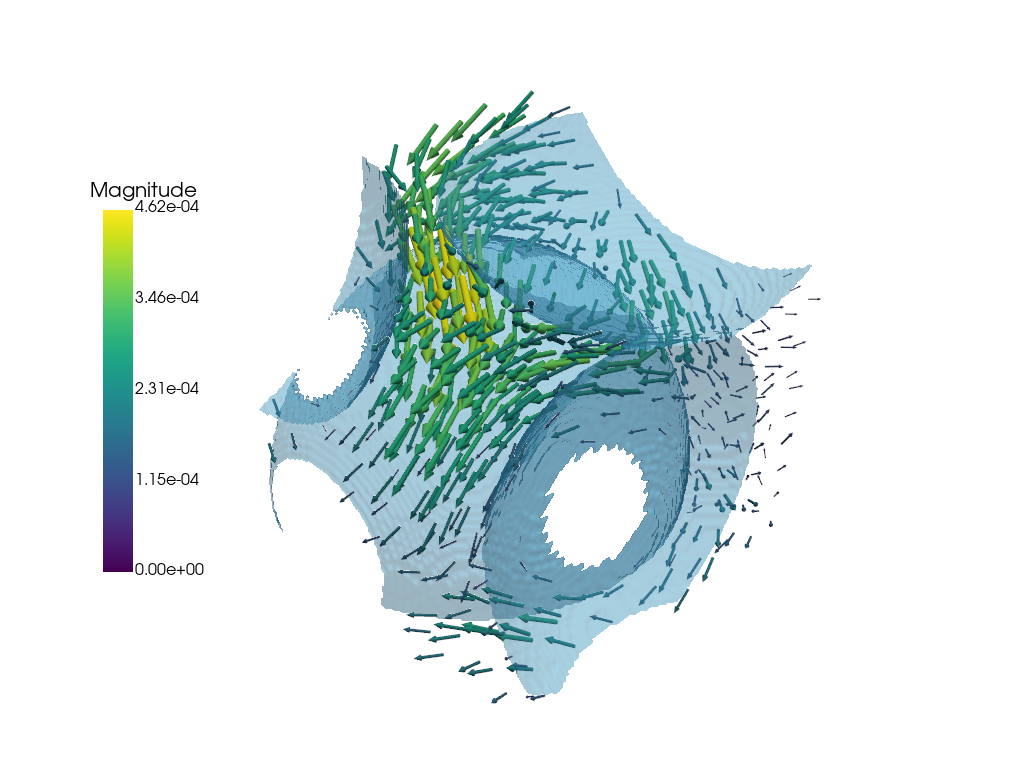

In [30]:
p = dpm.visualization.plot_glyph(bentheimer_ss_data)

# We can add additional meshes to the same plotter object!
dpm.visualization.plot_isosurface(bentheimer_ss_data, 
                        show_isosurface=[0.5],
                        fig=p)

p.show(jupyter_backend="static")

## Streamlines

Finally, we can plot our streamlines. Similar to the glyph function, we use the output plotter object of the ``dpm_tools.visualization.plot_streamlines()`` as input to a bounding box and plot isosurface functions.

C:\Users\bcc2459\AppData\Local\Temp\ipykernel_20776\738951420.py:6: UserWarning: 

No value provided for 'show_isosurfaces' keyword. Using the midpoint of the isosurface array instead (0,                      1).

  dpm.visualization.plot_isosurface(bentheimer_ss_data, fig=fig_streamlines,


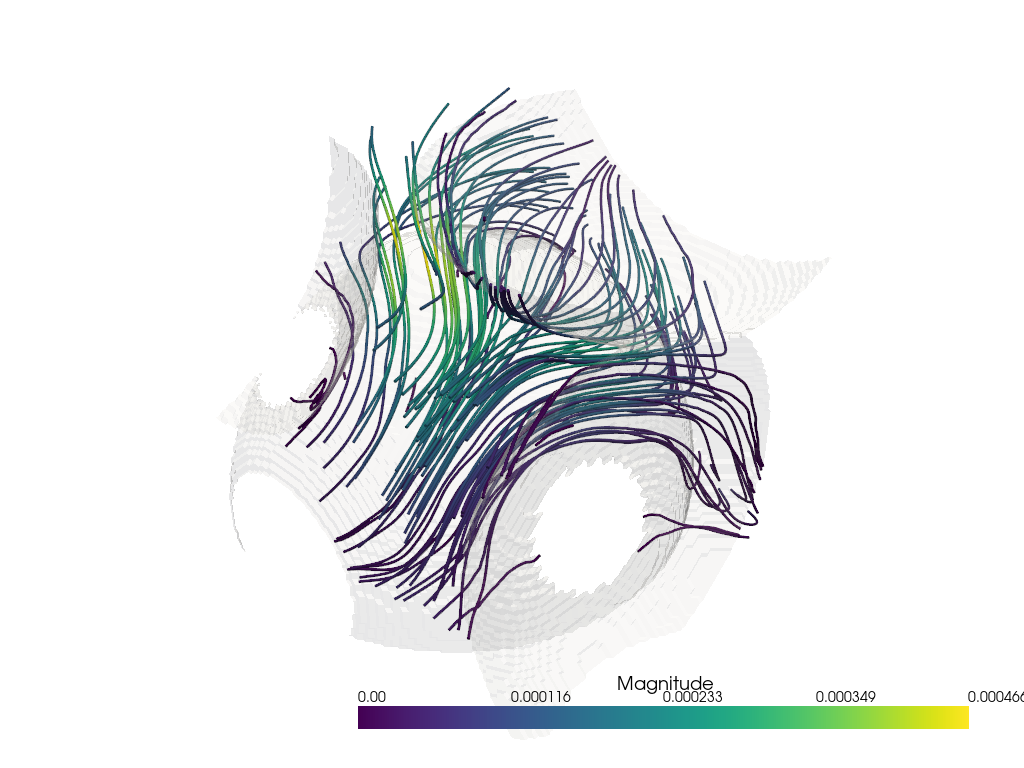

In [4]:
## Plotting the streamlines with a bounding box
fig_streamlines = dpm.visualization.plot_streamlines(bentheimer_ss_data)

## Adding a bounding box to the streamlines
# dpm.visualization.bounding_box(bentheimer_ss_data, fig=fig_streamlines)
dpm.visualization.plot_isosurface(bentheimer_ss_data, fig=fig_streamlines,
                           mesh_kwargs={'color': (255, 255, 255), 'opacity': 0.15})
fig_streamlines.show(jupyter_backend="static")